In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('menu.csv')

In [3]:
df

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,...,80,27,1,4,64,12,15,0,40,8
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,...,106,35,1,5,85,15,20,0,50,10
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,...,53,18,1,2,43,8,10,0,25,6
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,...,114,38,2,9,103,21,20,0,60,6


In [4]:
df.shape

(260, 24)

In [10]:
# iterating the columns
for col in df.columns:
    print(col)

Category
Item
Serving Size
Calories
Calories from Fat
Total Fat
Total Fat (% Daily Value)
Saturated Fat
Saturated Fat (% Daily Value)
Trans Fat
Cholesterol
Cholesterol (% Daily Value)
Sodium
Sodium (% Daily Value)
Carbohydrates
Carbohydrates (% Daily Value)
Dietary Fiber
Dietary Fiber (% Daily Value)
Sugars
Protein
Vitamin A (% Daily Value)
Vitamin C (% Daily Value)
Calcium (% Daily Value)
Iron (% Daily Value)


In [11]:
#Check statistical facts and calculate maximum values
columns_of_interest = ['Calories', 'Total Fat', 'Carbohydrates', 'Dietary Fiber', 'Sugars', 'Protein',
                      'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 'Calcium (% Daily Value)',
                      'Iron (% Daily Value)']


In [12]:
# Summary statistics
summary_stats = df[columns_of_interest].describe()
print(summary_stats)

          Calories   Total Fat  Carbohydrates  Dietary Fiber      Sugars  \
count   260.000000  260.000000     260.000000     260.000000  260.000000   
mean    368.269231   14.165385      47.346154       1.630769   29.423077   
std     240.269886   14.205998      28.252232       1.567717   28.679797   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%     210.000000    2.375000      30.000000       0.000000    5.750000   
50%     340.000000   11.000000      44.000000       1.000000   17.500000   
75%     500.000000   22.250000      60.000000       3.000000   48.000000   
max    1880.000000  118.000000     141.000000       7.000000  128.000000   

          Protein  Vitamin A (% Daily Value)  Vitamin C (% Daily Value)  \
count  260.000000                 260.000000                 260.000000   
mean    13.338462                  13.426923                   8.534615   
std     11.426146                  24.366381                  26.345542   
min      0.0000

In [13]:
# Calculate maximum values
max_values = df[columns_of_interest].max()
print("\nMaximum values:")
print(max_values)



Maximum values:
Calories                     1880.0
Total Fat                     118.0
Carbohydrates                 141.0
Dietary Fiber                   7.0
Sugars                        128.0
Protein                        87.0
Vitamin A (% Daily Value)     170.0
Vitamin C (% Daily Value)     240.0
Calcium (% Daily Value)        70.0
Iron (% Daily Value)           40.0
dtype: float64


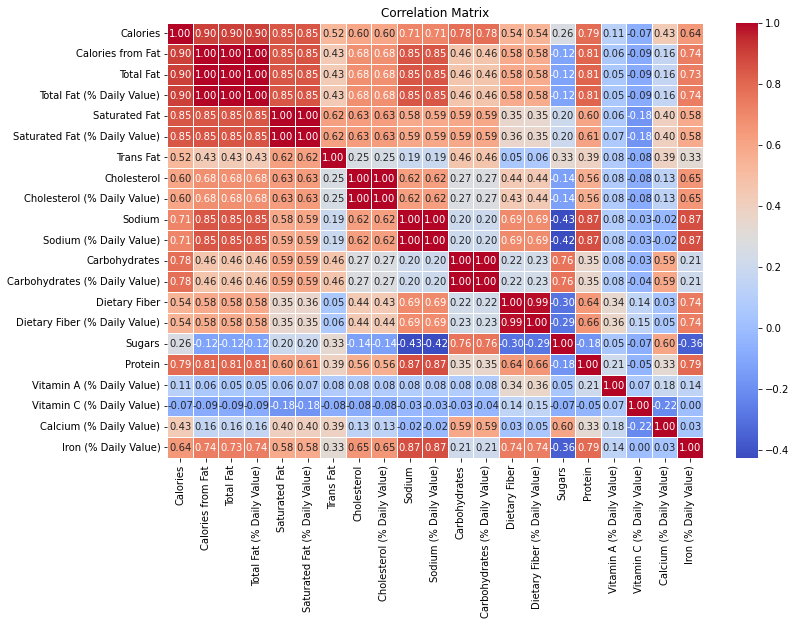

In [14]:
# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

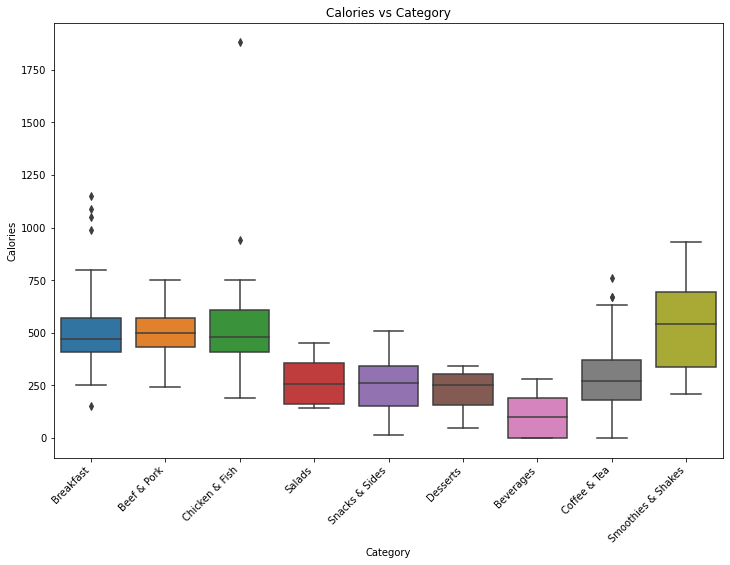

In [15]:
# Draw boxplot for Calories vs Category
plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='Calories', data=df)
plt.title('Calories vs Category')
plt.xticks(rotation=45, ha='right')
plt.show()

In [16]:
# Find items with maximum values for each attribute
max_calories_item = df.loc[df['Calories'].idxmax()]
max_total_fat_item = df.loc[df['Total Fat'].idxmax()]
max_carbohydrates_item = df.loc[df['Carbohydrates'].idxmax()]
max_dietary_fiber_item = df.loc[df['Dietary Fiber'].idxmax()]
max_sugars_item = df.loc[df['Sugars'].idxmax()]
max_protein_item = df.loc[df['Protein'].idxmax()]
max_vitamin_a_item = df.loc[df['Vitamin A (% Daily Value)'].idxmax()]
max_vitamin_c_item = df.loc[df['Vitamin C (% Daily Value)'].idxmax()]
max_calcium_item = df.loc[df['Calcium (% Daily Value)'].idxmax()]
max_iron_item = df.loc[df['Iron (% Daily Value)'].idxmax()]



In [17]:
# Display summary
summary = pd.DataFrame({
    'Attribute': ['Calories', 'Total Fat', 'Carbohydrates', 'Dietary Fiber', 'Sugars', 'Protein',
                  'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 'Calcium (% Daily Value)',
                  'Iron (% Daily Value)'],
    'Item': [max_calories_item['Item'], max_total_fat_item['Item'], max_carbohydrates_item['Item'],
             max_dietary_fiber_item['Item'], max_sugars_item['Item'], max_protein_item['Item'],
             max_vitamin_a_item['Item'], max_vitamin_c_item['Item'], max_calcium_item['Item'],
             max_iron_item['Item']],
    'Value': [max_calories_item['Calories'], max_total_fat_item['Total Fat'], max_carbohydrates_item['Carbohydrates'],
              max_dietary_fiber_item['Dietary Fiber'], max_sugars_item['Sugars'], max_protein_item['Protein'],
              max_vitamin_a_item['Vitamin A (% Daily Value)'], max_vitamin_c_item['Vitamin C (% Daily Value)'],
              max_calcium_item['Calcium (% Daily Value)'], max_iron_item['Iron (% Daily Value)']]
})


In [18]:
print(summary)

                   Attribute                                           Item  \
0                   Calories                   Chicken McNuggets (40 piece)   
1                  Total Fat                   Chicken McNuggets (40 piece)   
2              Carbohydrates                        Chocolate Shake (Large)   
3              Dietary Fiber    Big Breakfast with Hotcakes (Large Biscuit)   
4                     Sugars           McFlurry with M&M’s Candies (Medium)   
5                    Protein                   Chicken McNuggets (40 piece)   
6  Vitamin A (% Daily Value)    Premium Bacon Ranch Salad (without Chicken)   
7  Vitamin C (% Daily Value)               Minute Maid Orange Juice (Large)   
8    Calcium (% Daily Value)                       Strawberry Shake (Large)   
9       Iron (% Daily Value)  Big Breakfast with Hotcakes (Regular Biscuit)   

    Value  
0  1880.0  
1   118.0  
2   141.0  
3     7.0  
4   128.0  
5    87.0  
6   170.0  
7   240.0  
8    70.0  
9    40.0 

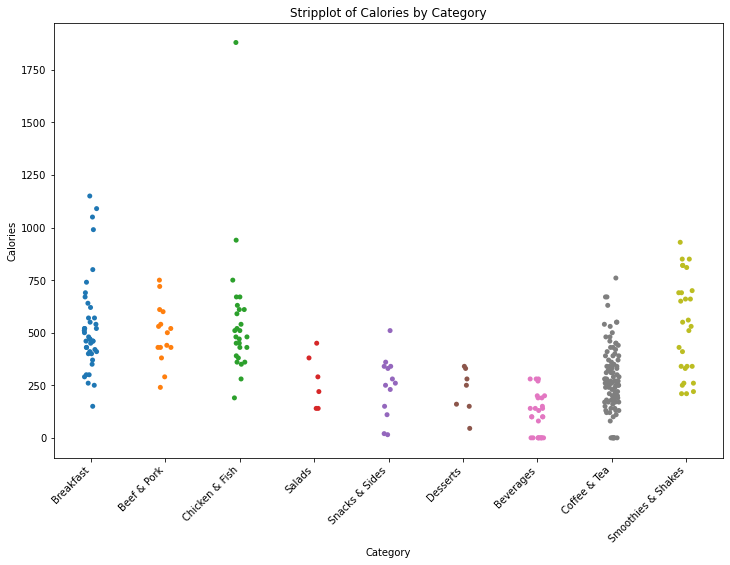

In [19]:
# Draw Stripplot for one attribute (e.g., Calories) against Category
plt.figure(figsize=(12, 8))
sns.stripplot(x='Category', y='Calories', data=df, jitter=True, dodge=True)
plt.title('Stripplot of Calories by Category')
plt.xticks(rotation=45, ha='right')
plt.show()


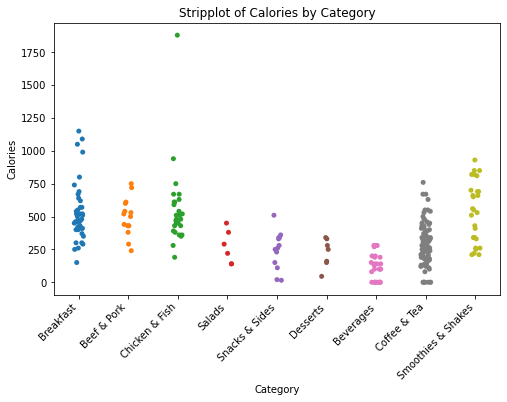

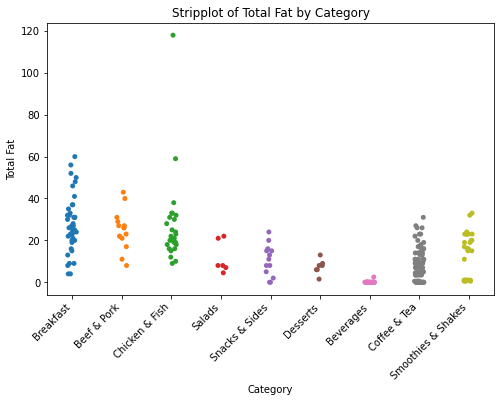

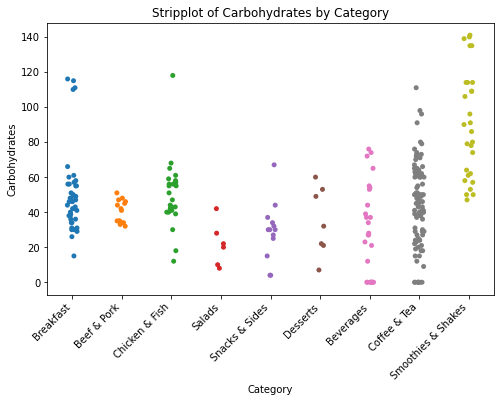

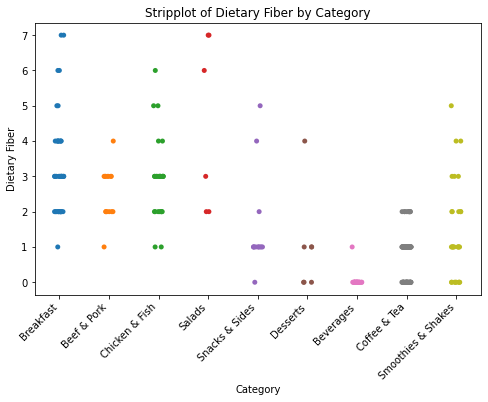

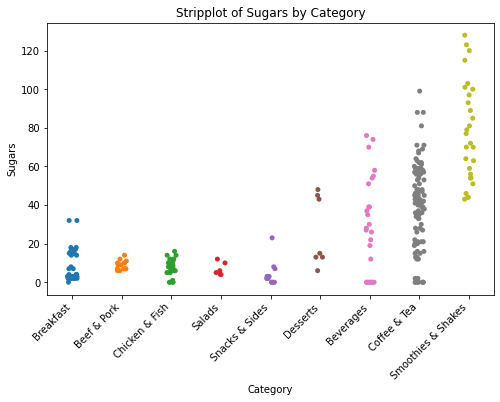

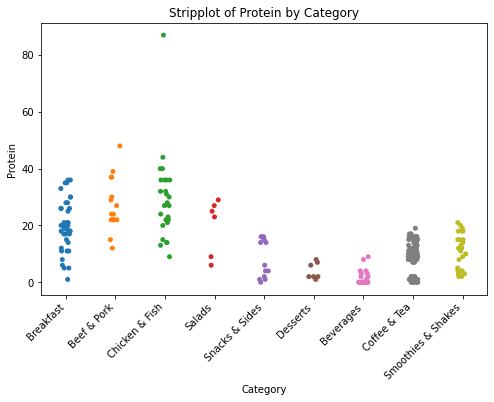

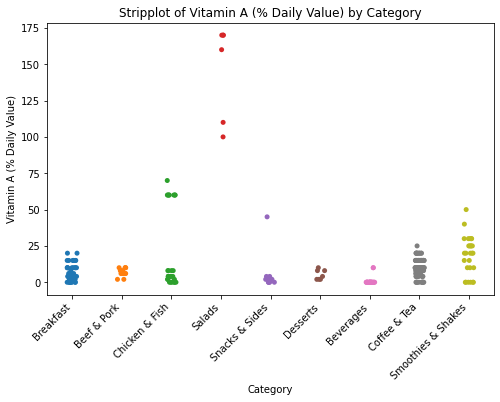

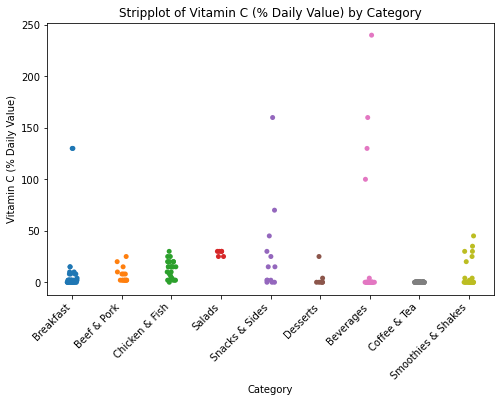

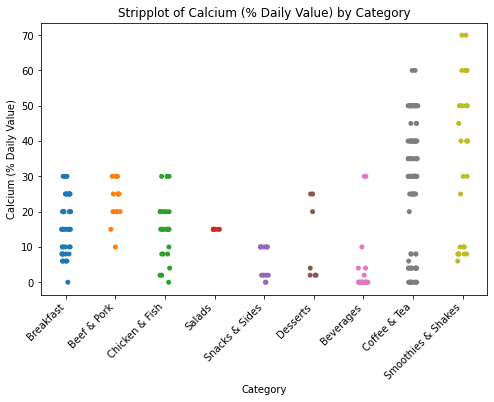

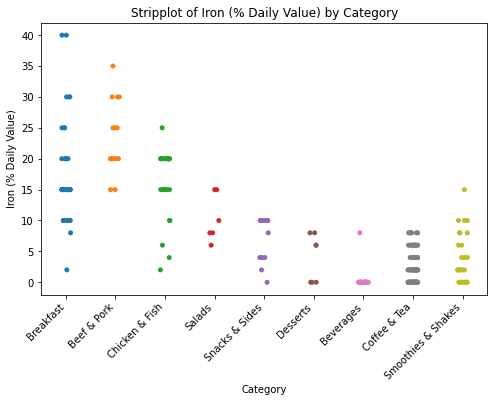

In [25]:
# Define list of attributes
attributes = ['Calories', 'Total Fat', 'Carbohydrates', 'Dietary Fiber', 'Sugars', 'Protein',
              'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 'Calcium (% Daily Value)',
              'Iron (% Daily Value)']

# Draw Stripplot for each attribute against Category
for attribute in attributes:
    plt.figure(figsize=(8, 5))
    sns.stripplot(x='Category', y=attribute, data=df, jitter=True, dodge=True)
    plt.title(f'Stripplot of {attribute} by Category')
    plt.xticks(rotation=45, ha='right')
    plt.show()


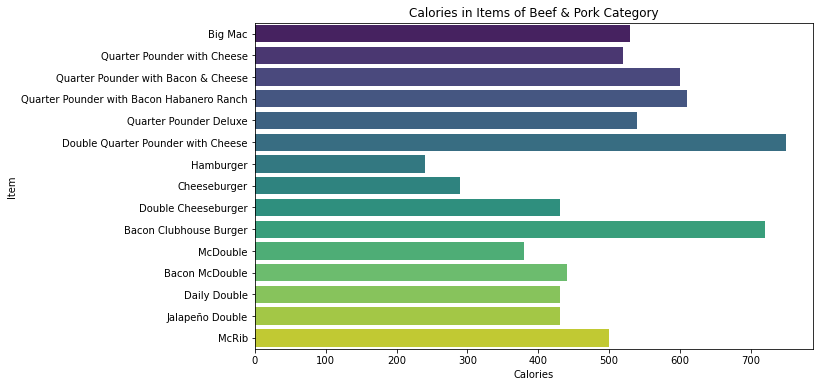

In [21]:
# Filter the DataFrame for Beef & Pork category
beef_pork_df = df[df['Category'] == 'Beef & Pork']

# Draw horizontal bar graph for items in Beef & Pork category against Calories
plt.figure(figsize=(10, 6))
sns.barplot(x='Calories', y='Item', data=beef_pork_df, palette='viridis')
plt.xlabel('Calories')
plt.ylabel('Item')
plt.title('Calories in Items of Beef & Pork Category')
plt.show()
